<a href="https://colab.research.google.com/github/Binu-Getachew/ML-Projects/blob/main/PCA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First thing first, import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Now create the data you wanna work with. It is possible to import data from other sources as well.

In [3]:
data= {
    'Height': [170,165,180,175,160,172,168,177,162,158],
    'Weight': [65,59,75,68,55,70,62,74,58,54],
    'Age': [25,23,30,28,21,26,24,29,22,2],
    'Gender': ['Male','Female','Male','Male','Female','Male','Female','Male','Female','Female']
}

df=pd.DataFrame(data)
print(df)

   Height  Weight  Age  Gender
0     170      65   25    Male
1     165      59   23  Female
2     180      75   30    Male
3     175      68   28    Male
4     160      55   21  Female
5     172      70   26    Male
6     168      62   24  Female
7     177      74   29    Male
8     162      58   22  Female
9     158      54    2  Female


First, let's see the distribution of 'Gender' in our dataset:

In [15]:
print("Gender Distribution:")
display(df['Gender'].value_counts())


Gender Distribution:


,count
Gender,
Male,5
Female,5


Now, let's look at the descriptive statistics for numerical columns, grouped by 'Gender', to understand differences between the groups:

In [13]:
print("Descriptive statistics grouped by Gender:")
display(df.groupby('Gender')[['Height', 'Weight', 'Age']].describe())

Descriptive statistics grouped by Gender:


Height                                                     Weight  \
        count   mean       std    min    25%    50%    75%    max  count   
Gender                                                                     
Female    5.0  162.6  3.974921  158.0  160.0  162.0  165.0  168.0    5.0   
Male      5.0  174.8  3.962323  170.0  172.0  175.0  177.0  180.0    5.0   

              ...               Age                                          \
        mean  ...   75%   max count  mean       std   min   25%   50%   75%   
Gender        ...                                                             
Female  57.6  ...  59.0  62.0   5.0  18.4  9.235800   2.0  21.0  22.0  23.0   
Male    70.4  ...  74.0  75.0   5.0  27.6  2.073644  25.0  26.0  28.0  29.0   

              
         max  
Gender        
Female  24.0  
Male    30.0  

[2 rows x 24 columns]

Standardize the data we just created above

In [4]:
x=df.drop('Gender',axis=1)
y=df['Gender']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

print(x_scaled)

[[ 0.18419807  0.13867505  0.26490647]
 [-0.52425605 -0.69337525  0.        ]
 [ 1.60110632  1.52542554  0.92717265]
 [ 0.8926522   0.5547002   0.66226618]
 [-1.23271018 -1.24807544 -0.26490647]
 [ 0.46757972  0.83205029  0.39735971]
 [-0.09918358 -0.2773501   0.13245324]
 [ 1.17603385  1.38675049  0.79471941]
 [-0.94932853 -0.83205029 -0.13245324]
 [-1.51609183 -1.38675049 -2.78151795]]


Let's look at the descriptive statistics for the numerical features in your original data (`x`).

In [5]:
print("Descriptive statistics for the numerical data (x):")
display(x.describe())

Descriptive statistics for the numerical data (x):


,Height,Weight,Age
count,10.000000,10.00000,10.000000
mean,168.700000,64.00000,23.000000
std,7.439385,7.60117,7.958224
min,158.000000,54.00000,2.000000
25%,162.750000,58.25000,22.250000
50%,169.000000,63.50000,24.500000
75%,174.250000,69.50000,27.500000
max,180.000000,75.00000,30.000000


You can also calculate specific statistics like the mean and standard deviation for each column individually:

In [6]:
print("Mean of each column in x:")
display(x.mean())

print("\nStandard deviation of each column in x:")
display(x.std())

Mean of each column in x:


,0
Height,168.7
Weight,64.0
Age,23.0



Standard deviation of each column in x:


,0
Height,7.439385
Weight,7.601170
Age,7.958224


Applying the PCA algorithm and training Linear Regression by 0.7 to 0.3

In [16]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3, random_state=42)

model=LogisticRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)


Confusion matrix and accuracy

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test,y_pred))



Confusion Matrix:
[[2 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00         2
        Male       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Confusion Matrix plots

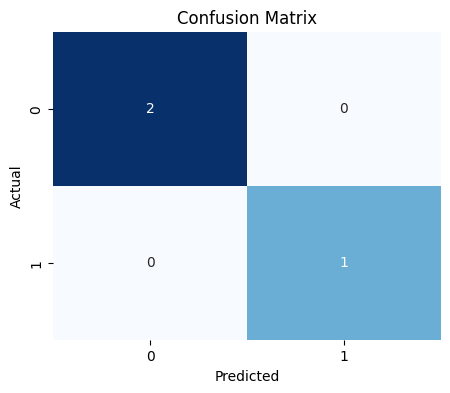

In [30]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#x_ticklables=['Male','Female']
#y_ticklables=['Male','Female']
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Visualizing PCA result

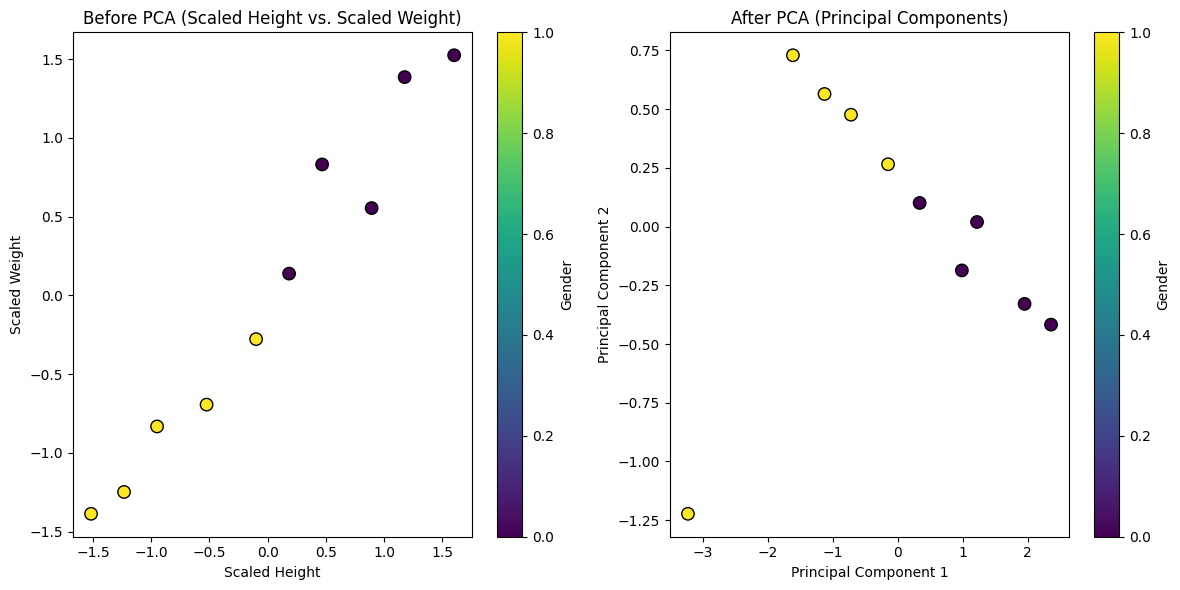

In [32]:
y_numeric= pd.factorize(y)[0]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_numeric, cmap='viridis', edgecolors='k',s=80)
plt.xlabel('Scaled Height')
plt.ylabel('Scaled Weight')
plt.title('Before PCA (Scaled Height vs. Scaled Weight)')
plt.colorbar(label='Gender')

plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_numeric, cmap='viridis', edgecolors='k',s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA (Principal Components)')
plt.colorbar(label='Gender')

plt.tight_layout()
plt.show()